In [56]:
%matplotlib inline
import numpy as np
import math
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn import datasets
from sklearn import svm
import matplotlib.pyplot as plt

### a.

In [3]:
digits = datasets.load_digits()
rs = ShuffleSplit(3, 0.25)
for train, test in rs.split(digits.data):
    clf = svm.SVC(gamma=0.001, C=1.0)
    clf.fit(digits.data[train], digits.target[train])
    print("Accuracy (training): " + str(clf.score(digits.data[train], digits.target[train])))
    print("Accuracy (test): " + str(clf.score(digits.data[test], digits.target[test])))

Accuracy (training): 0.9977728285077951
Accuracy (test): 0.9888888888888889
Accuracy (training): 0.9985152190051967
Accuracy (test): 0.9977777777777778
Accuracy (training): 0.9977728285077951
Accuracy (test): 0.9911111111111112


### b.

In [4]:
rs = ShuffleSplit(10, 0.25)
crossval= cross_val_score(svm.SVC(gamma=0.001, C=1.0), digits.data, digits.target, cv=rs)
crossval

array([0.99555556, 0.98888889, 1.        , 0.98888889, 0.98222222,
       0.99111111, 0.98666667, 0.99555556, 0.99777778, 0.99111111])

In [5]:
np.mean(crossval)

0.9917777777777779

In [6]:
np.std(crossval) / math.sqrt(crossval.shape[0])

0.001634504493194066

### c.

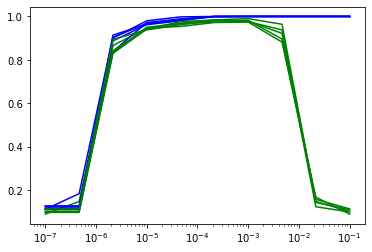

In [52]:
gammas = np.logspace(-7, -1, 10)
rs = ShuffleSplit(5, 500, 500)
plt.xscale('log')
for train, test in rs.split(digits.data):
    tra_vals = []
    tst_vals = []
    for g in gammas:
        clf = svm.SVC(gamma=g, C=10)
        clf.fit(digits.data[train], digits.target[train])
        tra_vals.append(clf.score(digits.data[train], digits.target[train]))
        tst_vals.append(clf.score(digits.data[test], digits.target[test]))
    plt.plot(gammas, tra_vals, color='blue')
    plt.plot(gammas, tst_vals, color='green')

< 2.15443469e-06 -> underfitting <br>
\> 4.64158883e-03 -> overfitting <br>
= 1.00000000e-03 -> optimal

### d.

In [64]:
svc_params = { 'C': np.logspace(-1, 2, 4), 'gamma': np.logspace(-4, 0, 5) }
clf = GridSearchCV(svm.SVC(), svc_params, cv=3)
clf.fit(digits.data[:500], digits.target[:500])
clf.cv_results_

/home/me/.local/lib64/python3.6/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'mean_fit_time': array([0.01633215, 0.01527754, 0.01668978, 0.01854499, 0.01831683,
        0.00885908, 0.01205079, 0.01842284, 0.01994491, 0.01965896,
        0.00607975, 0.01228118, 0.01816424, 0.02058053, 0.01959395,
        0.00581423, 0.01200008, 0.01886113, 0.02061637, 0.01957393]),
 'mean_score_time': array([0.00446105, 0.00457358, 0.00437856, 0.0042971 , 0.00453742,
        0.0037787 , 0.00334501, 0.00432523, 0.00437355, 0.00486199,
        0.002853  , 0.00331624, 0.00435368, 0.00437172, 0.00455483,
        0.00270454, 0.00326626, 0.00450516, 0.0043246 , 0.00452741]),
 'mean_test_score': array([0.31 , 0.854, 0.128, 0.106, 0.138, 0.89 , 0.92 , 0.61 , 0.106,
        0.138, 0.922, 0.924, 0.634, 0.106, 0.138, 0.928, 0.924, 0.634,
        0.106, 0.138]),
 'param_C': masked_array(data=[0.1, 0.1, 0.1, 0.1, 0.1, 1.0, 1.0, 1.0, 1.0, 1.0, 10.0,
                    10.0, 10.0, 10.0, 10.0, 100.0, 100.0, 100.0, 100.0,
                    100.0],
              mask=[False, False, False, Fal

In [65]:
clf.score(digits.data[500:], digits.target[500:])

0.9414032382420972